In [23]:
from EMNIST import x_train, y_train, x_test, y_test
from sklearn.linear_model import LogisticRegression
from random import randint, shuffle
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
clf_lgr = LogisticRegression()

In [3]:
x_train_lgr = list(x_train)
y_train_lgr = y_train
x_test_lgr = list(x_test)
y_test_lgr = y_test

In [4]:
clf_lgr.fit(x_train_lgr, y_train_lgr)

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
predicted_lgr = clf_lgr.predict(x_test_lgr)
expected_lgr = y_test_lgr

In [6]:
x_test_lgr = np.array(x_test_lgr)

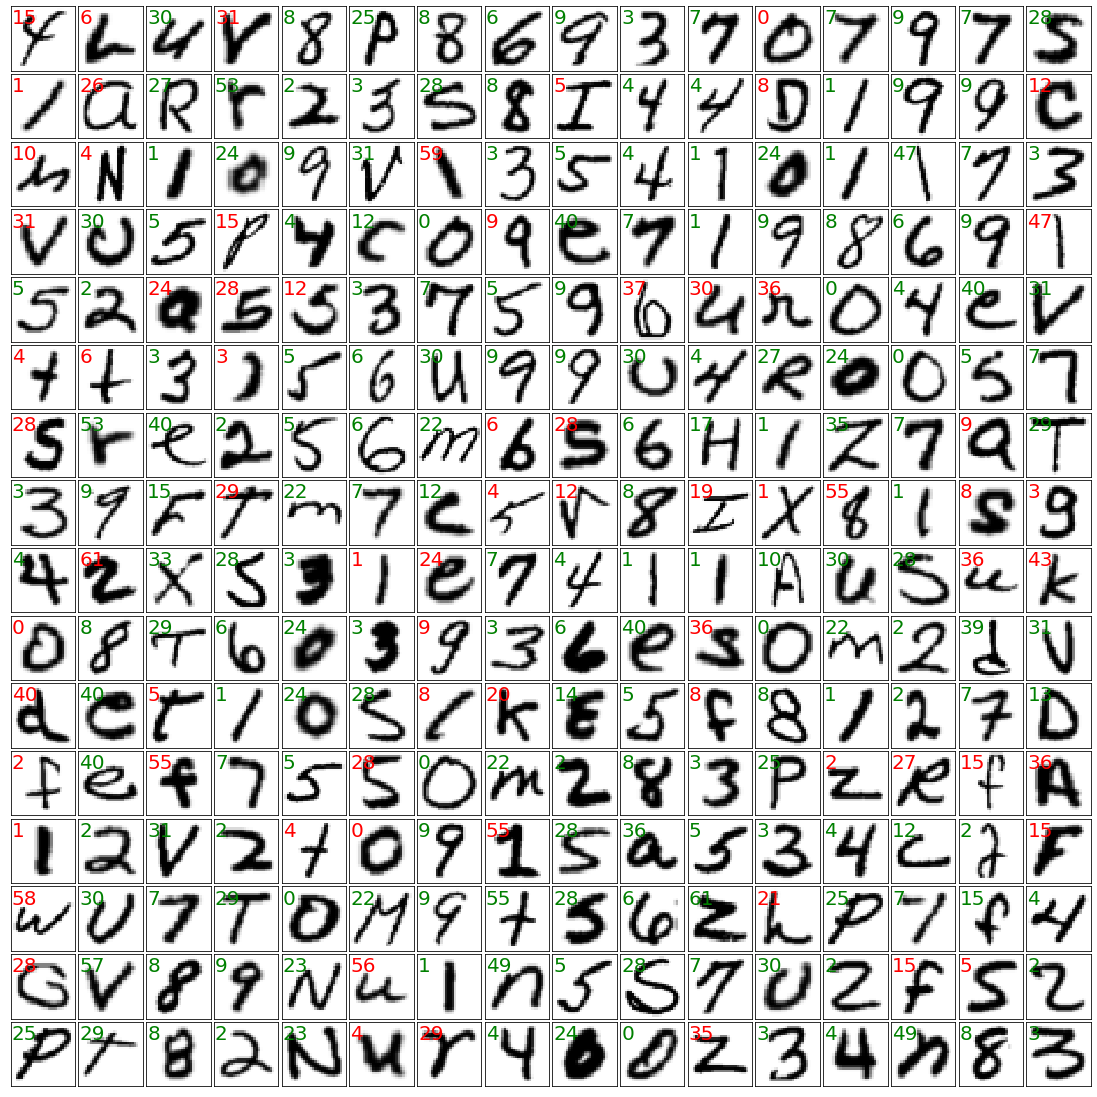

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_lgr) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_lgr.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted_lgr[i] == expected_lgr[i]:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('LGR EMNIST DESBALANCEADO.png', dpi=fig.dpi, edgecolor="purple")

In [8]:
print(metrics.classification_report(expected_lgr, predicted_lgr))

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.77      0.70      5778
           1       0.59      0.90      0.71      6330
           2       0.83      0.87      0.85      5869
           3       0.86      0.91      0.88      5969
           4       0.73      0.82      0.77      5619
           5       0.75      0.75      0.75      5190
           6       0.86      0.93      0.89      5705
           7       0.91      0.93      0.92      6139
           8       0.78      0.84      0.81      5633
           9       0.83      0.91      0.87      5686
          10       0.66      0.68      0.67      1062
          11       0.68      0.46      0.55       648
          12       0.63      0.71      0.67      1739
          13       0.70      0.58      0.63       779
          14       0.79      0.61      0.68       851
          15       0.61      0.66      0.64      1440
          16       0.78      0.52      0.62       447
          17       0.68    

In [9]:
df = pd.DataFrame(metrics.confusion_matrix(expected_lgr, predicted_lgr))
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,4463,3,6,4,19,22,13,6,34,3,...,0,4,0,13,0,0,0,0,0,1
1,1,5687,6,22,9,7,1,24,52,5,...,1,21,0,49,0,0,0,9,1,0
2,12,10,5111,45,13,4,14,21,91,4,...,3,4,0,8,0,3,0,9,0,56
3,17,5,48,5417,2,103,1,45,61,38,...,1,0,0,16,0,0,0,0,4,1
4,1,5,11,1,4582,2,38,2,21,155,...,0,14,0,229,9,5,5,4,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,0,1,0,41,0,3,0,4,0,...,0,17,0,5,0,111,2,0,1,0
58,0,0,2,0,7,0,5,0,0,0,...,0,0,0,6,2,0,275,0,0,0
59,0,20,6,2,16,1,0,2,22,1,...,0,6,0,7,0,8,0,173,8,1
60,1,13,1,6,126,3,0,6,4,1,...,0,1,0,7,0,5,0,2,30,0


In [10]:
train_counts = list()
y_train_lgr = list(y_train_lgr)
for i in range (62):
    train_counts.append(y_train_lgr.count(i))
train_counts

[34585,
 38374,
 34203,
 35143,
 33535,
 31416,
 34232,
 35754,
 33946,
 33847,
 6407,
 3878,
 10094,
 4562,
 4934,
 9182,
 2517,
 3152,
 11946,
 3762,
 2468,
 5076,
 9002,
 8237,
 24983,
 8347,
 2605,
 5073,
 20764,
 9820,
 12602,
 4637,
 4695,
 2771,
 4743,
 2701,
 10033,
 5159,
 2854,
 10177,
 24631,
 2561,
 3687,
 8738,
 2725,
 1896,
 2491,
 15318,
 2645,
 11418,
 2749,
 2448,
 2994,
 14105,
 2699,
 18262,
 2830,
 2910,
 2697,
 2822,
 2365,
 2725]

In [11]:
for i in range (len(y_train_lgr)):
    y_train_lgr[i] = [y_train_lgr[i], i]

In [13]:
y_train_lgr.sort()

In [60]:
x_train_balanced = list()
y_train_balanced = list()
n = 1895
intervalos = list()
for i in range (62):
    inf = sum(train_counts[:i]) + 1
    inf_mas_1 = sum(train_counts[:i+1])
    sup = min(inf + n, inf_mas_1)
    intervalos.append([inf, sup])
for i in range (62):
    y_train_balanced.extend(y_train_lgr[intervalos[i][0]:intervalos[i][1]])
shuffle(y_train_balanced)
for i in range (len(y_train_balanced)):
    x_train_balanced.append(x_train_lgr[y_train_balanced[i][1]])
    y_train_balanced[i] = y_train_balanced[i][0]

In [61]:
train_counts2 = list()
for i in range (62):
    train_counts2.append(y_train_balanced.count(i))

In [62]:
clases62 = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [63]:
max(train_counts2)

1895

In [64]:
min(train_counts2)

1895

O


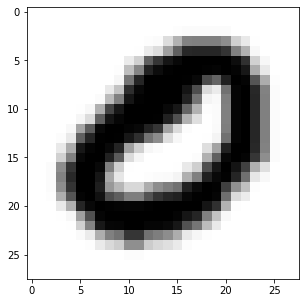

In [65]:
plt.figure(figsize=(5, 5))
random_numero = randint(0, len(x_train_balanced))
plt.imshow(x_train_balanced[random_numero].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
print(clases62[y_train_balanced[random_numero]])

In [66]:
inicio = time.time()
clf_lgr2 = LogisticRegression()
clf_lgr2.fit(x_train_balanced, y_train_balanced)
fin = time.time()
print(fin - inicio)

133.0380299091339


c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
y_test_lgr = list(y_test_lgr)
test_counts = list()
for i in range (61):
    test_counts.append(y_test_lgr.count(i))

In [115]:
y_test_balanced.count(1)

1079

In [123]:
test_counts

[5778,
 6330,
 5869,
 5969,
 5619,
 5190,
 5705,
 6139,
 5633,
 5686,
 1062,
 648,
 1739,
 779,
 851,
 1440,
 447,
 521,
 2048,
 626,
 382,
 810,
 1485,
 1351,
 4156,
 1397,
 413,
 809,
 3508,
 1576,
 2002,
 796,
 806,
 432,
 798,
 464,
 1644,
 853,
 432,
 1683,
 4092,
 400,
 589,
 1479,
 427,
 317,
 466,
 2535,
 464,
 1898,
 466,
 368,
 505,
 2320,
 437,
 2965,
 482,
 468,
 467,
 470,
 381]

In [157]:
min(test_counts)

317

In [148]:
for i in range (len(y_test)):
    y_test_lgr[i] = [y_test[i], i]
y_test_lgr.sort()

In [158]:
x_test_balanced = list()
y_test_balanced = list()
n = 317
intervalos = list()
for i in range (62):
    inf = sum(test_counts[:i]) + 1
    sup = inf + n
    intervalos.append([inf, sup])
for i in range (62):
    y_test_balanced.extend(y_test_lgr[intervalos[i][0]:intervalos[i][1]])
shuffle(y_test_balanced)
for i in range (len(y_test_balanced)):
    x_test_balanced.append(x_test[y_test_balanced[i][1]])
    y_test_balanced[i] = y_test_balanced[i][0]
intervalos

[[1, 318],
 [5779, 6096],
 [12109, 12426],
 [17978, 18295],
 [23947, 24264],
 [29566, 29883],
 [34756, 35073],
 [40461, 40778],
 [46600, 46917],
 [52233, 52550],
 [57919, 58236],
 [58981, 59298],
 [59629, 59946],
 [61368, 61685],
 [62147, 62464],
 [62998, 63315],
 [64438, 64755],
 [64885, 65202],
 [65406, 65723],
 [67454, 67771],
 [68080, 68397],
 [68462, 68779],
 [69272, 69589],
 [70757, 71074],
 [72108, 72425],
 [76264, 76581],
 [77661, 77978],
 [78074, 78391],
 [78883, 79200],
 [82391, 82708],
 [83967, 84284],
 [85969, 86286],
 [86765, 87082],
 [87571, 87888],
 [88003, 88320],
 [88801, 89118],
 [89265, 89582],
 [90909, 91226],
 [91762, 92079],
 [92194, 92511],
 [93877, 94194],
 [97969, 98286],
 [98369, 98686],
 [98958, 99275],
 [100437, 100754],
 [100864, 101181],
 [101181, 101498],
 [101647, 101964],
 [104182, 104499],
 [104646, 104963],
 [106544, 106861],
 [107010, 107327],
 [107378, 107695],
 [107883, 108200],
 [110203, 110520],
 [110640, 110957],
 [113605, 113922],
 [114087, 114

In [159]:
y_test_balanced.count(50)

317

In [160]:
predicted_lgr = clf_lgr.predict(x_test_balanced)
expected_lgr = y_test_balanced
predicted_lgr2 = clf_lgr2.predict(x_test_balanced)
expected_lgr2 = y_test_balanced

In [161]:
print(metrics.classification_report(expected_lgr2, predicted_lgr2))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49       317
           1       0.42      0.47      0.44       317
           2       0.73      0.64      0.68       317
           3       0.77      0.81      0.79       317
           4       0.53      0.62      0.57       317
           5       0.63      0.62      0.62       317
           6       0.79      0.80      0.79       317
           7       0.85      0.86      0.85       317
           8       0.69      0.67      0.68       317
           9       0.64      0.79      0.71       317
          10       0.68      0.74      0.71       317
          11       0.70      0.79      0.74       317
          12       0.50      0.45      0.47       317
          13       0.72      0.77      0.75       317
          14       0.74      0.67      0.70       317
          15       0.53      0.41      0.46       317
          16       0.77      0.80      0.78       317
          17       0.72    

In [162]:
df = pd.DataFrame(metrics.confusion_matrix(expected_lgr2, predicted_lgr2))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,167,0,0,1,0,1,0,0,0,0,1,0,2,11,0,0,0,0,0,1,0,0,0,0,44,0,8,0,0,0,1,0,0,0,0,0,2,1,2,1,1,0,2,1,0,0,0,0,0,1,65,2,0,0,0,0,0,0,1,0,0,1
1,0,148,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,26,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,3,1,0,24,4,0,89,0,0,0,0,0,1,0,5,0,1,0,0,5,0
2,0,1,204,1,2,0,0,1,2,0,1,1,0,2,2,0,1,1,5,3,0,4,0,0,0,0,4,1,0,0,0,1,0,1,0,31,3,0,1,1,0,0,4,0,3,3,1,0,0,0,1,0,2,0,0,0,0,0,0,1,0,28
3,1,0,1,258,0,3,0,2,3,1,0,8,0,1,0,0,0,0,1,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,6,0,0,4,0,0,0,1,1,0,1,0,7,1,0,0,0,0,0,5
4,0,0,0,0,196,0,1,0,0,3,7,0,0,0,0,3,1,7,0,0,0,0,1,2,0,0,1,0,0,2,5,5,1,0,14,0,1,0,0,4,0,4,2,0,0,0,0,0,0,0,0,0,2,0,0,18,4,0,0,0,33,0
5,0,0,1,9,3,196,0,1,6,0,0,3,7,3,9,1,5,0,3,6,2,0,0,0,0,0,0,1,24,0,0,0,0,0,0,0,1,1,0,0,0,2,3,0,0,3,0,0,0,0,0,1,1,2,20,1,0,0,0,1,1,0
6,0,0,0,0,0,0,253,0,0,0,0,0,0,1,3,0,16,0,0,0,0,6,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,27,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
7,0,0,0,1,1,0,0,273,0,7,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,4,0,0,0,5,0,0,0,0,5,0,0,0,0,0,0,1,6,0,0,0,0,0,0,2,0,4,0,1,0,0,0,0,0,0,2,0
8,0,1,0,1,0,4,0,0,211,1,1,18,1,0,3,1,0,0,2,0,2,0,1,0,0,5,0,4,0,1,0,1,0,2,1,0,0,0,0,1,1,4,10,0,3,0,1,2,0,0,0,4,18,4,1,1,0,0,0,4,1,1
9,0,0,0,2,6,0,0,5,1,251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,2,0,0,3,0,0,0,0,4,0,0,0,0,0,0,2,9,0,0,0,0,0,0,1,0,2,23,0,0,0,0,0,0,0,1,0


In [163]:
df = pd.DataFrame(metrics.confusion_matrix(expected_lgr, predicted_lgr))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,239,0,0,1,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,286,0,0,0,2,0,0,3,0,1,0,0,0,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,10,0,0,0,0,0,0,0,4,0,0,0,0,0,0
2,0,3,275,3,2,0,0,1,5,0,0,0,1,1,2,0,0,0,6,0,0,2,0,0,1,0,2,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
3,1,0,3,285,0,4,0,3,4,4,0,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,261,0,2,0,0,9,2,0,0,0,0,5,0,0,0,0,0,0,1,2,1,0,0,0,0,0,5,1,0,0,8,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,14,0,0,0,0,0,0
5,0,0,0,10,2,238,2,1,7,0,0,1,7,1,2,0,1,0,2,2,0,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,300,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,296,0,8,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0
8,0,3,0,3,0,3,0,0,277,2,1,4,1,0,1,0,0,0,0,0,1,0,1,0,0,3,0,1,1,1,0,0,0,1,1,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,2,3,0,1,0,0,0,0,0,1
9,0,0,0,5,10,1,0,8,2,285,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [156]:
print(metrics.classification_report(expected_lgr, predicted_lgr))

              precision    recall  f1-score   support

           0       0.33      0.69      0.44       100
           1       0.30      0.88      0.45       100
           2       0.39      0.88      0.54       100
           3       0.56      0.87      0.68       100
           4       0.33      0.86      0.48       100
           5       0.48      0.76      0.59       100
           6       0.54      0.96      0.69       100
           7       0.71      0.94      0.81       100
           8       0.42      0.86      0.56       100
           9       0.46      0.85      0.60       100
          10       0.72      0.74      0.73       100
          11       0.80      0.45      0.58       100
          12       0.40      0.67      0.50       100
          13       0.84      0.56      0.67       100
          14       0.83      0.57      0.67       100
          15       0.47      0.67      0.55       100
          16       0.88      0.60      0.71       100
          17       0.90    

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
